tensor([-0.0695,  0.1100,  0.0863, -0.1528, -0.0572,  0.0577, -0.0365, -0.0800,
         0.0305,  0.0490, -0.0201,  0.0297,  0.1070, -0.0670,  0.0448,  0.0558,
         0.0678, -0.0988,  0.0625, -0.0502])


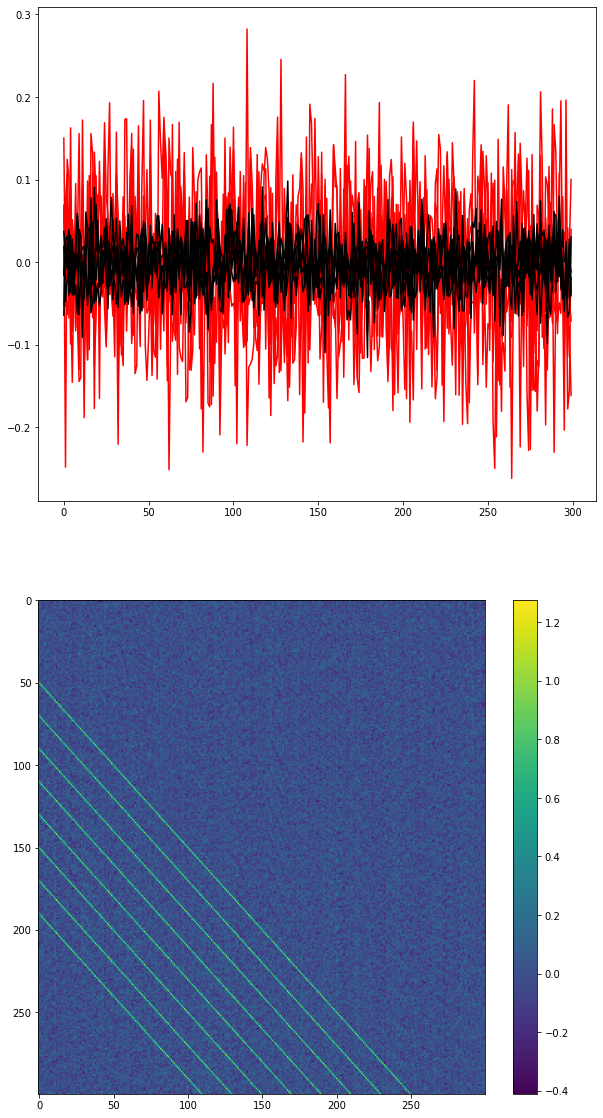

In [1]:
%load_ext autoreload
%autoreload 2

import torch
import spe
import numpy as np
import matplotlib.pyplot as plt

# create the positional encoder, with a resolution (max lag) of 500
device = 'cuda' if torch.cuda.is_available() else 'cpu'
key_dim = 64

encoder = spe.SimpleSpectralSPE(dimension=key_dim, max_lag=100).to(device)

m = 300
n = 300

q = torch.ones(1, m, key_dim, device=device)
k = torch.ones(1, n, key_dim, device=device)

# generate some encodings of length
qhat, khat = encoder(q,k,num=1024)

# display the first 20 of them
qhat = qhat.detach()
khat = khat.detach()
plt.figure(figsize=[10,20])
plt.subplot(211)
plt.plot(qhat[0,:,:5].cpu(), 'r');
plt.plot(khat[0,:,:5].cpu(), 'k');

# compute the p.T p to display the corresponding attention matrix
plt.subplot(212)
C = torch.mm(qhat[0], khat[0].T)
#C = torch.relu(C)
plt.imshow(C.detach().cpu().numpy(), aspect='auto')
plt.colorbar()
print(torch.diag(C)[:20])

torch.Size([300, 300])
torch.Size([1, 300, 1024])


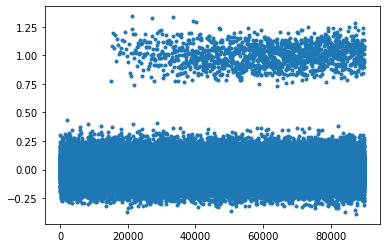

In [6]:
print(C.shape)
print(qhat.shape)
plt.plot(C.view(-1), '.')

In [4]:
from torch.nn.functional import pad
v = torch.ones(5)
print(v)

tensor([1., 1., 1., 1., 1.])


In [4]:
v = torch.linspace(1,10,10)
v[1::2]

tensor([ 2.,  4.,  6.,  8., 10.])

In [193]:
n= 100
r=50


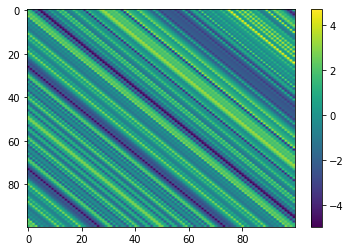

In [248]:
v = torch.randn(r, dtype=torch.cfloat); v=v/v.abs()
Vq = v[None, :] ** torch.linspace(0,1000,n)[:, None]
Vk = v[None, :] ** torch.linspace(500,1500,n)[:, None]
lamb = torch.rand(r)
Q = Vq*lamb[None]
K = Vk*lamb[None]
#plt.imshow((AA).detach().cpu().numpy(), aspect='auto')
plt.imshow(torch.mm(Q, torch.conj(K.T)).real.detach().cpu().numpy(), aspect='auto')
plt.colorbar()

In [246]:
Q.shape

torch.Size([100, 50])

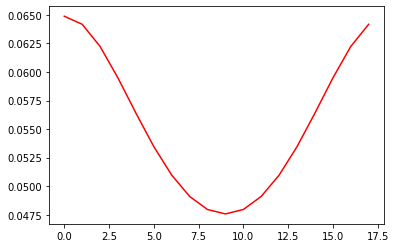

In [9]:
from torch.fft import rfft, irfft
v = torch.logspace(0, -10, 10)
#plt.plot(v,'k')
plt.plot(irfft(v),'r')
